In [55]:
import numpy as np
import sympy as sym
from scipy import integrate
import matplotlib.pyplot as plt
import pandas as pd
import os.path as path
import urllib.request as urll
import math as mt

In [57]:
#TODOS LOS EJERCICIOS TEÓRICOS ESTÁN EN EL SIGUIENTE DRIVE: 
### https://drive.google.com/file/d/177tlG82TvCTZKNBRlX_HeJFGjm3AtRZZ/view?usp=sharing

-f(x_0)*(x - x_1)*(x - x_2)/((x_0 - x_1)*(x_0 - x_2)**2) - f(x_0)*(x - x_1)*(x - x_2)/((x_0 - x_1)**2*(x_0 - x_2)) + f(x_1)*(x - x_0)*(x - x_2)/((-x_0 + x_1)**2*(x_1 - x_2)) - f(x_1)*(x - x_2)/((-x_0 + x_1)*(x_1 - x_2)) + f(x_2)*(x - x_0)*(x - x_1)/((-x_0 + x_2)**2*(-x_1 + x_2)) - f(x_2)*(x - x_1)/((-x_0 + x_2)*(-x_1 + x_2))
(0.5*tan(xd)**2 + 0.5)/tan(xd)**0.5


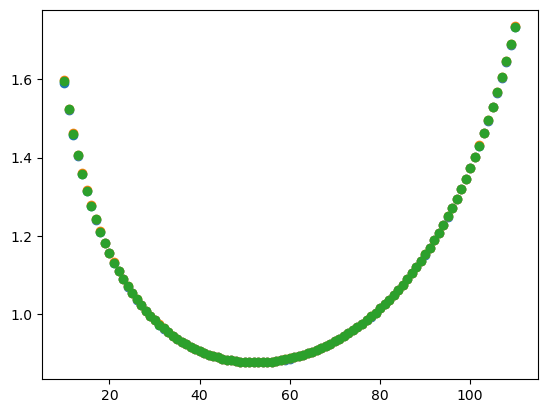

In [39]:
#Ejercicio Derivación. Ejercicio 8 - 20 raíces primeros 20 polinomios de Laguerre
#Derivacion ej. 8
#b 
x_f = sym.Symbol('x')
x_0 = sym.Symbol('x_0')
x_1 = sym.Symbol('x_1')
f0 = sym.Symbol('f(x_0)')
x_2 = sym.Symbol('x_2')
f1 = sym.Symbol('f(x_1)')
f2 = sym.Symbol('f(x_2)')

#polinomio
p = f0*(x_f - x_1)*(x_f - x_2)/((x_0 - x_1)*(x_0-x_2) ) + f1*(x_f - x_0)*(x_f - x_2)/((x_1 - x_0)*(x_1-x_2) )+ f2*(x_f - x_0)*(x_f - x_1)/((x_2 - x_0)*(x_2-x_1) )
pp = sym.diff(p, x_0)
print(pp)

#c,d,
uno = []
central = []


def Function(x):
    return (np.tan(x))**0.5


def Derivative(f,x,h):
    d = 0.
    
    if h != 0:
        d = (-3*f(x) +4*f(x+h) - f(x +2*h))/(2*h)
        
    return d


def CentralDerivative(f,x,h):
    
    d = 0.
    
    if h != 0:
        d = (f(x+h) - f(x-h))/(2*h)
        
    return d
x = []

xd = sym.Symbol('xd') 
d1 = (sym.tan(xd))**0.5


derivada = sym.diff(d1, xd)

der = sym.lambdify(xd, derivada)

print(derivada)
analitica = []
for i in range(10, 111,1):
  x.append(i)
  uno.append(Derivative(Function,i/100,0.01))
  central.append(CentralDerivative(Function,i/100,0.01))
  analitica.append(der(i/100))
  
uno
central
analitica
#falta calculo derivada analitica
#f
plt.scatter(x,uno)
plt.scatter(x,central)
plt.scatter(x,analitica)


Como se evidencia en el punto anterior, la derivada central tiene menos error pues el orden de magnitud es menor (exponente -4).


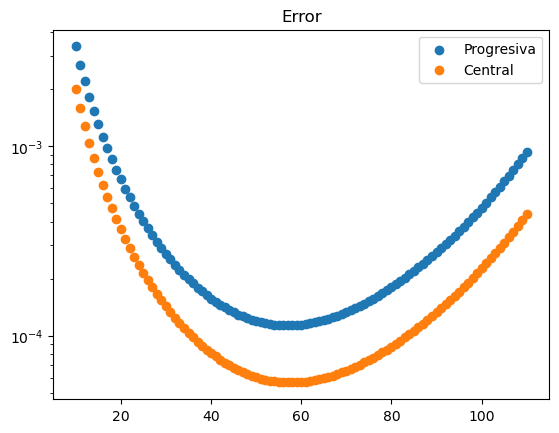

In [43]:
error = []
error2 = []

for i in range(len(uno)):
  #falta calculo error
  error.append(np.abs(uno[i]-analitica[i]))
  error2.append(np.abs(central[i]-analitica[i]))

plt.scatter(x,error,label='Progresiva')
plt.scatter(x,error2,label='Central')
plt.yscale('log')
plt.title('Error')
plt.legend()

print("Como se evidencia en el punto anterior, la derivada central tiene menos error pues el orden de magnitud es menor (exponente -4).")

In [45]:
#Ejercicio Raíces de Polinomios. Ejercicio 5 - 20 raíces primeros 20 polinomios de Laguerre
def Laguerre(n):
    x= sym.Symbol("x",Real=True)
    y= sym.Symbol("y",Real=True)
    e=np.e
    y= (e**(-x))*(x**n)
    p= ((e**x)/np.math.factorial(n))*sym.diff(y,x,n)
    poly=sym.lambdify([x],p,'numpy')
    return poly
def Derivative(f,x,h=1e-8):
    return (f(x+h)-f(x-h))/(2*h)
def Metod_Newton(f,der_f,xn,h=1e-8,iter_max=1000,preci=1e-8):
    err=1
    itera=0
    while err > preci and itera < iter_max:
        
        try:
            
            xn1 = xn - f(xn)/der_f(f,xn)
            #err = np.abs(f(xn)/der_f(f,xn,c))
            err=np.abs((xn1-xn)/xn)
            
        except ZeroDivisionError:
            print('Division por cero, pruebe otro valor')
            
        xn = xn1
        itera += 1
        #print('raiz:', xn,itera,err)
    
    if itera == iter_max:
        return False
    else:
        return xn
def GetAllRoots(x,Funcion,tolerancia=5):
    
    Roots = np.array([])
    
    if np.abs(Funcion(0)) < 1e-10:
        Roots=np.append(Roots,0)
    
    for i in x:
        root = Metod_Newton(Funcion,Derivative,i)
        
        if root != False:
            
            croot = np.round( root, tolerancia )
            
            if croot not in Roots:
                Roots = np.append(Roots,croot)
                
    Roots.sort()
    
    return Roots
def Calc_Raiz_20_pol():
    Raices=np.array([])
    n=np.arange(21)
    
    for i in n:
        if i !=0:
        
            x=np.linspace(0,100,200)
            r=GetAllRoots(x,Laguerre(i))
            
            Raices=np.append(Raices,"Laguerre grad "+str(i)+":")
            Raices=np.append(Raices, r)
        
    return Raices
r=Calc_Raiz_20_pol()
for i in r:
    print(i)

/var/folders/5_/3j3b5c_901n_b4dg2sp2lvgr0000gn/T/ipykernel_16495/421453130.py:21: RuntimeWarning: divide by zero encountered in double_scalars
  err=np.abs((xn1-xn)/xn)


Laguerre grad 1:
1.0
Laguerre grad 2:
0.58579
3.41421
Laguerre grad 3:
0.41577
2.29428
6.28995
Laguerre grad 4:
0.32255
1.74576
4.53662
9.39507
Laguerre grad 5:
0.26356
1.4134
3.59643
7.08581
12.6408
Laguerre grad 6:
0.22285
1.18893
2.99274
5.77514
9.83747
15.98287
Laguerre grad 7:
0.19304
1.02666
2.56788
4.90035
8.18215
12.73418
19.39573
Laguerre grad 8:
0.17028
0.9037
2.25109
4.2667
7.04591
10.75852
15.74068
22.86313
Laguerre grad 9:
0.15232
0.80722
2.00514
3.78347
6.20496
9.37299
13.46624
18.8336
26.37407
Laguerre grad 10:
0.13779
0.72945
1.80834
3.40143
5.5525
8.33015
11.84379
16.27926
21.99659
29.9207
Laguerre grad 11:
0.1258
0.66542
1.64715
3.09114
5.02928
7.50989
10.60595
14.43161
19.17886
25.21771
33.49719
Laguerre grad 12:
0.11572
0.61176
1.51261
2.83375
4.59923
6.84453
9.62132
13.00605
17.11686
22.15109
28.48797
37.09912
Laguerre grad 13:
0.10714
0.56613
1.39856
2.6166
4.23885
6.29226
8.815
11.8614
15.51076
19.88464
25.18526
31.80039
40.72301
Laguerre grad 14:
0.09975
0.52686

10.0 20.0


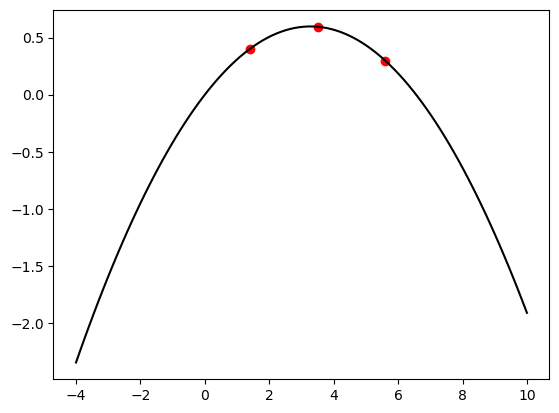

In [48]:
#Ejercicio Interpolación de Lagrange. Ejercicio 4 - Estimación de Vector velocidad lineal

url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Parabolico.csv'
filename = 'InterpolacionNewton.csv'
Data= pd.read_csv(filename,sep=",")

X=np.float64(Data["X"])
Y=np.float64(Data["Y"])

g= -9.8

def Lagrange(x,xi,i):
    prod= 1.0
    n=len(xi)
    
    for j in range(n):
        if j != i:
            prod *= (x-xi[j])/(xi[i]-xi[j])
            
    return prod

def Poly(x,xi,yi):
    Sum=0
    n=len(xi)
    
    for i in range(n):
        Sum += yi[i]*Lagrange(x,xi,i)
    return Sum

xg=np.linspace(-4,10,100)
yg=Poly(xg,X,Y)

plt.scatter(X,Y,color="r")
plt.plot(xg,yg,color="k")

M=np.vander(X)

coeff= np.linalg.solve(M,Y)

coef_lin=coeff[-2]
coef_cuad=coeff[-3]

theta=np.arctan(coef_lin)

V0=(g/((coef_cuad)*(2*(np.cos(theta))**2)))**(1/2)
theta = np.degrees(theta)

V0 = round(V0, 2)
theta = round(theta, 2)
print(V0,theta)

La función que interpola y que pasa por los puntos en el archivo es:


-0.34145435774264*x**5 + 5.84804869821673*x**4 - 35.6998197753506*x**3 + 89.657566164176*x**2 - 68.8369730888011*x - 18.0

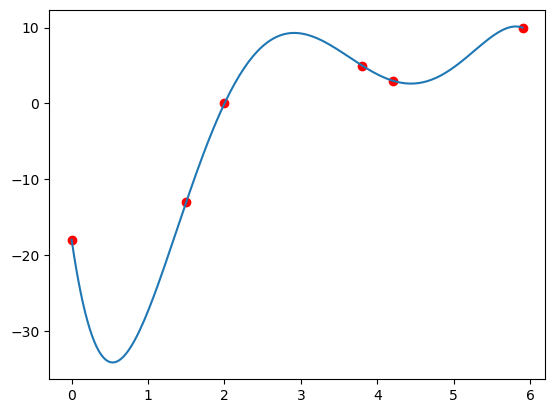

In [54]:
#Ejercicio Interpolación de Lagrange. Ejercicio 5 - Interpolación Newton Gregory

url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/InterpolacionNewtonNoequi.csv'
filename = 'InterpolacionNewtonNoequi.csv'

Data = pd.read_csv(filename,sep=",")

X = np.float64(Data['X'])
Y = np.float64(Data['Y'])

def NewtonGregory(X,Y,x):
    
    Sum_ = Y[0]
    
    Diff = np.zeros((len(X),len(Y)))
    Diff[:,0] = Y
            
    poly = 1.0

    for i in range(1,len(X)):
        
        poly *= ( x - X[i-1] )
    
        for j in range(i, len(X)):
            h = X[j]-X
            Diff[j,i] = (Diff[j,i-1]-Diff[j-1,i-1])/h[j-i]
            
        Sum_ += poly*(Diff[i,i])
        
        
    return Sum_,np.round(Diff,2)

x = np.linspace(np.min(X),np.max(X),200)
y,_ = NewtonGregory(X,Y,x)

plt.scatter(X,Y,color='red')
plt.plot(x,y)

x = sym.Symbol('x',Real='True')
y,_ = NewtonGregory(X,Y,x)

y = y.simplify()
print("La función que interpola y que pasa por los puntos en el archivo es:")
y

El volumen aproximado de la semiesfera es: 4.0e-6*f(x_1) + 2.093650377824


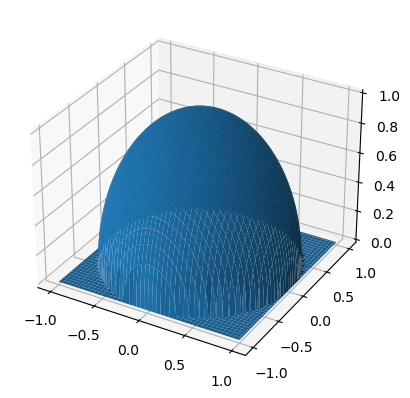

In [6]:
#Ejercicio Integración. Ejercicio 7 - Calcular volumen de una semiesfera
n = 500
R = 1
x = np.linspace(-R,R,n+1)
y = np.linspace(-R,R,n+1)

X,Y = np.meshgrid(x,y)

def f(x,y,R=1.):
    z = R**2 - x**2 - y**2
    
    if z <= 0.:
        return 0.
    else:
        return np.sqrt(z)
f = np.vectorize(f)
Z = f(X,Y)

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

ax.plot_surface(X,Y,Z)

dx = 2*R/n

vol_aprox = 0

for i in range(n):
    for j in range(n):
        x1 = x[j]
        y1 = y[i]
        x2 = x[j+1]
        y2 = y[i+1]
        
        if x1**2 + y1**2 <= 1 and x2**2 + y2**2 <= 1:
            
            if x1**2 + y1**2 < 1:
                f1 = np.sqrt(1 - x1**2 - y1**2) 
            if x1**2 + y1**2 > 1:
                f1 = 0
            if x2**2 + y1**2 < 1:
                f2 = np.sqrt(1 - x2**2 - y1**2)
            if x2**2 + y1**2 > 1:
                f2 = 0
            if x2**2 + y2**2 < 1:
                f3 = np.sqrt(1 - x2**2 - y2**2)
            if x2**2 + y2**2 > 1:
                f3 = 0
            if x1**2 + y2**2 < 1:
                f4 = np.sqrt(1 - x1**2 - y2**2)
            if x1**2 + y2**2 > 1:
                f4 = 0
            f_avg = (f1 + f2 + f3 + f4)/4
            
            vol_aprox += f_avg * dx**2
            
print("El volumen aproximado de la semiesfera es:", vol_aprox)

In [7]:
#Ejercicio Integración. Ejercicio 14 - Escribir polinomio en base de Legendre
def GetLegendre(n):
    
    x = sym.Symbol('x',Real=True)
    y = sym.Symbol('y',Real=True)
    
    y = (x**2 - 1)**n
    
    p = sym.diff(y,x,n)/(2**n * np.math.factorial(n))
    
    return p

Legendre = []
DerLegendre = []

x = sym.Symbol('x',Real=True)
n=2

for i in range(n+1):
    
    poly = GetLegendre(i)
    
    Legendre.append(poly)
    DerLegendre.append(sym.diff(poly,x,1))

print("Los primeros 3 polinomios de Legendre son: ", Legendre)

#Planteamos un sistema de ecuaciones igualando el valor de cada componente al valor que debe tener en la ecuacion inicial.
#Donde 3 + 5x + x**2 = C1P0(x)+C2P1(x)+C3P2(x)
#Por lo que, sabemos que:
#                        3 = C1-C3/2
#                        5 = C2
#                        1 = 3*C3/2
matriz = [[1,0,-1/2],
          [0,0,3/2],
          [0,1,0]]
vector =[3,1,5]

resp = np.linalg.solve(matriz,vector)
print("La solución a esta matriz es: ", resp)

poly = resp[0]*GetLegendre(0)+resp[1]*GetLegendre(1)+resp[2]*GetLegendre(2)
poly

print("La respuesta seria que el polinomio se escribiria en base de Legendre como, \n10/3*P_0(x) + 5P_1(x) + 2/3*P_2(x)")

Los primeros 3 polinomios de Legendre son:  [1, x, (3*x**2 - 1)/2]
La solución a esta matriz es:  [3.33333333 5.         0.66666667]
La respuesta seria que el polinomio se escribiria en base de Legendre como, 
10/3*P_0(x) + 5P_1(x) + 2/3*P_2(x)


3 : 6.481130171540027


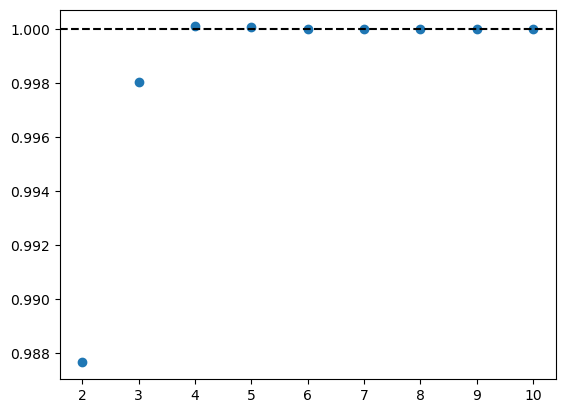

In [8]:
#Ejercicio Integración. Ejercicio 17 - Radiación de Cuerpo Negro
a = 0
b = 1

f = lambda x : np.exp(x)*(x**3/(np.exp(x)-1))
n=3

rts,wghts=np.polynomial.laguerre.laggauss(n)
#x = 0.5*((b-a)*rts + a + b)
Int= np.sum(wghts*f(rts))



Int= np.sum(wghts*f(rts))



print(n,":",Int)

"""
Graficar error relativo
"""
Err= lambda I: (I)/((np.pi**4)/15)
x= np.arange(2,11)
y=np.array([])
for i in x:
    
    rts,wghts=np.polynomial.laguerre.laggauss(i)
    #t = 0.5*((b-a)*rts + a + b)
    Int2= np.sum(wghts*f(rts))
    
    
   
    
    Integral= Int2
    
    y=np.append(y,Err(Integral))

plt.scatter(x,y)
plt.axhline(1,color="k",linestyle="dashed")
plt.show()

In [64]:
#Ejercicio Integración. Ejercicio 18 - Gauss-Hermite

def Hermite(n):
    x = sym.Symbol("x",Real=True)
    y = sym.Symbol("y",Real=True)
    e = np.e
    y = (e**(-x**2))
    p = ((-1**n)*(e**(n**2)))*sym.diff(y,x,n)
    polinomio = sym.lambdify([x],p,'numpy')

    return polinomio

def Derivative(f,x,h=1e-8):
    return (f(x+h)-f(x-h))/(2*h)

def Metod_Newt(f,der_f,xn,h=1e-8,iter_max=1000,preci=1e-8):
    err=1
    itera=0
    while err > preci and itera < iter_max:
        
        try:
            
            xn1 = xn - f(xn)/der_f(f,xn)
            err=np.abs((xn1-xn)/xn)
            
        except ZeroDivisionError:
            print('Division por cero, pruebe otro valor')
            
        xn = xn1
        itera += 1
    
    if itera == iter_max:
        return False
    else:
        return xn
    
def GetAllRoots(x,Funcion,tolerancia=5):
    
    Roots = np.array([])
    
    if np.abs(Funcion(0)) < 1e-10:
        Roots=np.append(Roots,0)
    
    for i in x:
        root = Metod_Newt(Funcion,Derivative,i)
        
        if root != False:
            
            croot = np.round( root, tolerancia )
            
            if croot not in Roots:
                Roots = np.append(Roots,croot)
                
    Roots.sort()
    
    return Roots

#PARTE A

#Calcular los primeros 20 ceros

def Calc_Raiz_pol(n):
    Raices = []    
    x=np.linspace(-5.6,5.6,1000)
    r=GetAllRoots(x,Hermite(n))
            
    Raices.append(r)
        
    return Raices

r = Calc_Raiz_pol(20)
r = r[0][0:20]
print(f"Las raices del polinomio de orden 20 de Hermite son: {r}")

#Calcular los pesos

def WHermite(r,n=20):
    Hn_1 = Hermite(n-1)
    Hr = Hn_1(r)
    p1 = (2**(n-1))/(n**2)
    p2 = mt.factorial(n)/(Hr**2)
    return p1*p2*mt.sqrt(np.pi)

pesos = []
for i in r:
    wi = WHermite(i)
    pesos.append(wi)

print(pesos)

# PARTE B


def gauss_legendre_integrate_ab(f,X,W,a,b):
    c1 = 0.5*(b-a)
    c2 = 0.5*(a+b)
    return c1*np.sum(W*f(c1*X + c2))



e = np.e
x = sym.Symbol("x",Real=True)
prob = (1/mt.sqrt(2))*((1/np.pi)**0.25)*(e**((-x**2)/2))*(2*x)
prob = sym.lambdify([x],prob,'numpy')

def f(x):
    return (prob(x)**2)*(x**2)
x_ini = -5
x_fin = 5

x2 = gauss_legendre_integrate_ab(f,Raices,Pesos,x_ini,x_fin)


print(f"El valor cuadrático medio de la posición de la particula en el primer estado exitado es: {x2}")

/var/folders/5_/3j3b5c_901n_b4dg2sp2lvgr0000gn/T/ipykernel_16495/1419194288.py:23: RuntimeWarning: invalid value encountered in double_scalars
  xn1 = xn - f(xn)/der_f(f,xn)


Las raices del polinomio de orden 20 de Hermite son: [-5.38748 -4.60368 -3.94476 -3.34785 -2.78881 -2.25497 -1.73854 -1.23408
 -0.73747 -0.24534  0.24534  0.73747  1.23408  1.73854  2.25497  2.78881
  3.34785  3.94476  4.60368  5.38748]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
El valor cuadrático medio de la posición de la particula en el primer estado exitado es: 8.142291477e-314


/var/folders/5_/3j3b5c_901n_b4dg2sp2lvgr0000gn/T/ipykernel_16495/1419194288.py:81: RuntimeWarning: overflow encountered in double_scalars
  p2 = mt.factorial(n)/(Hr**2)


In [58]:
#Ejercicio Integración. Ejercicio 19 - Superconductividad BSC

#Para este ejercicio se intentó seguir con la lógica planteada en el enunciado, sin embargo encontraba problemas
#a la hora de desarrollarlo. Por ende, para que diera la respuesta, se modificó el orden del polinomio y se usó
#grado 34 mas no 20.

n = 34
r, w = np.polynomial.legendre.leggauss(n)

def BandaProhibida(Temp, bp):
    bpp = 300*(1.381*(10**-23))*bp
    f = lambda x: np.tanh(np.sqrt(x**2+bpp**2)*300/(2*Temp))/(np.sqrt(x**2+bpp**2))
    integral = (np.sum( w*f(h)))/2
    return integral

T = np.linspace(1,20,10000)
a = -1
b = 1
h = 0.5*((b-a)*r + a + b)
dt = T[0]-T[1]

for i in range(1, len(T)):
    integral = BandaProhibida(T[i], dt)
    if np.abs(integral-(1/0.3)) < 1e-4:
        temp = round(T[i],4)
print(f"La temperatura crtítica Tc es: {temp} K")

La temperatura crtítica Tc es: 12.1275 K
